## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd ..

/mnt/d/anomaly-detection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


/home/elch10/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


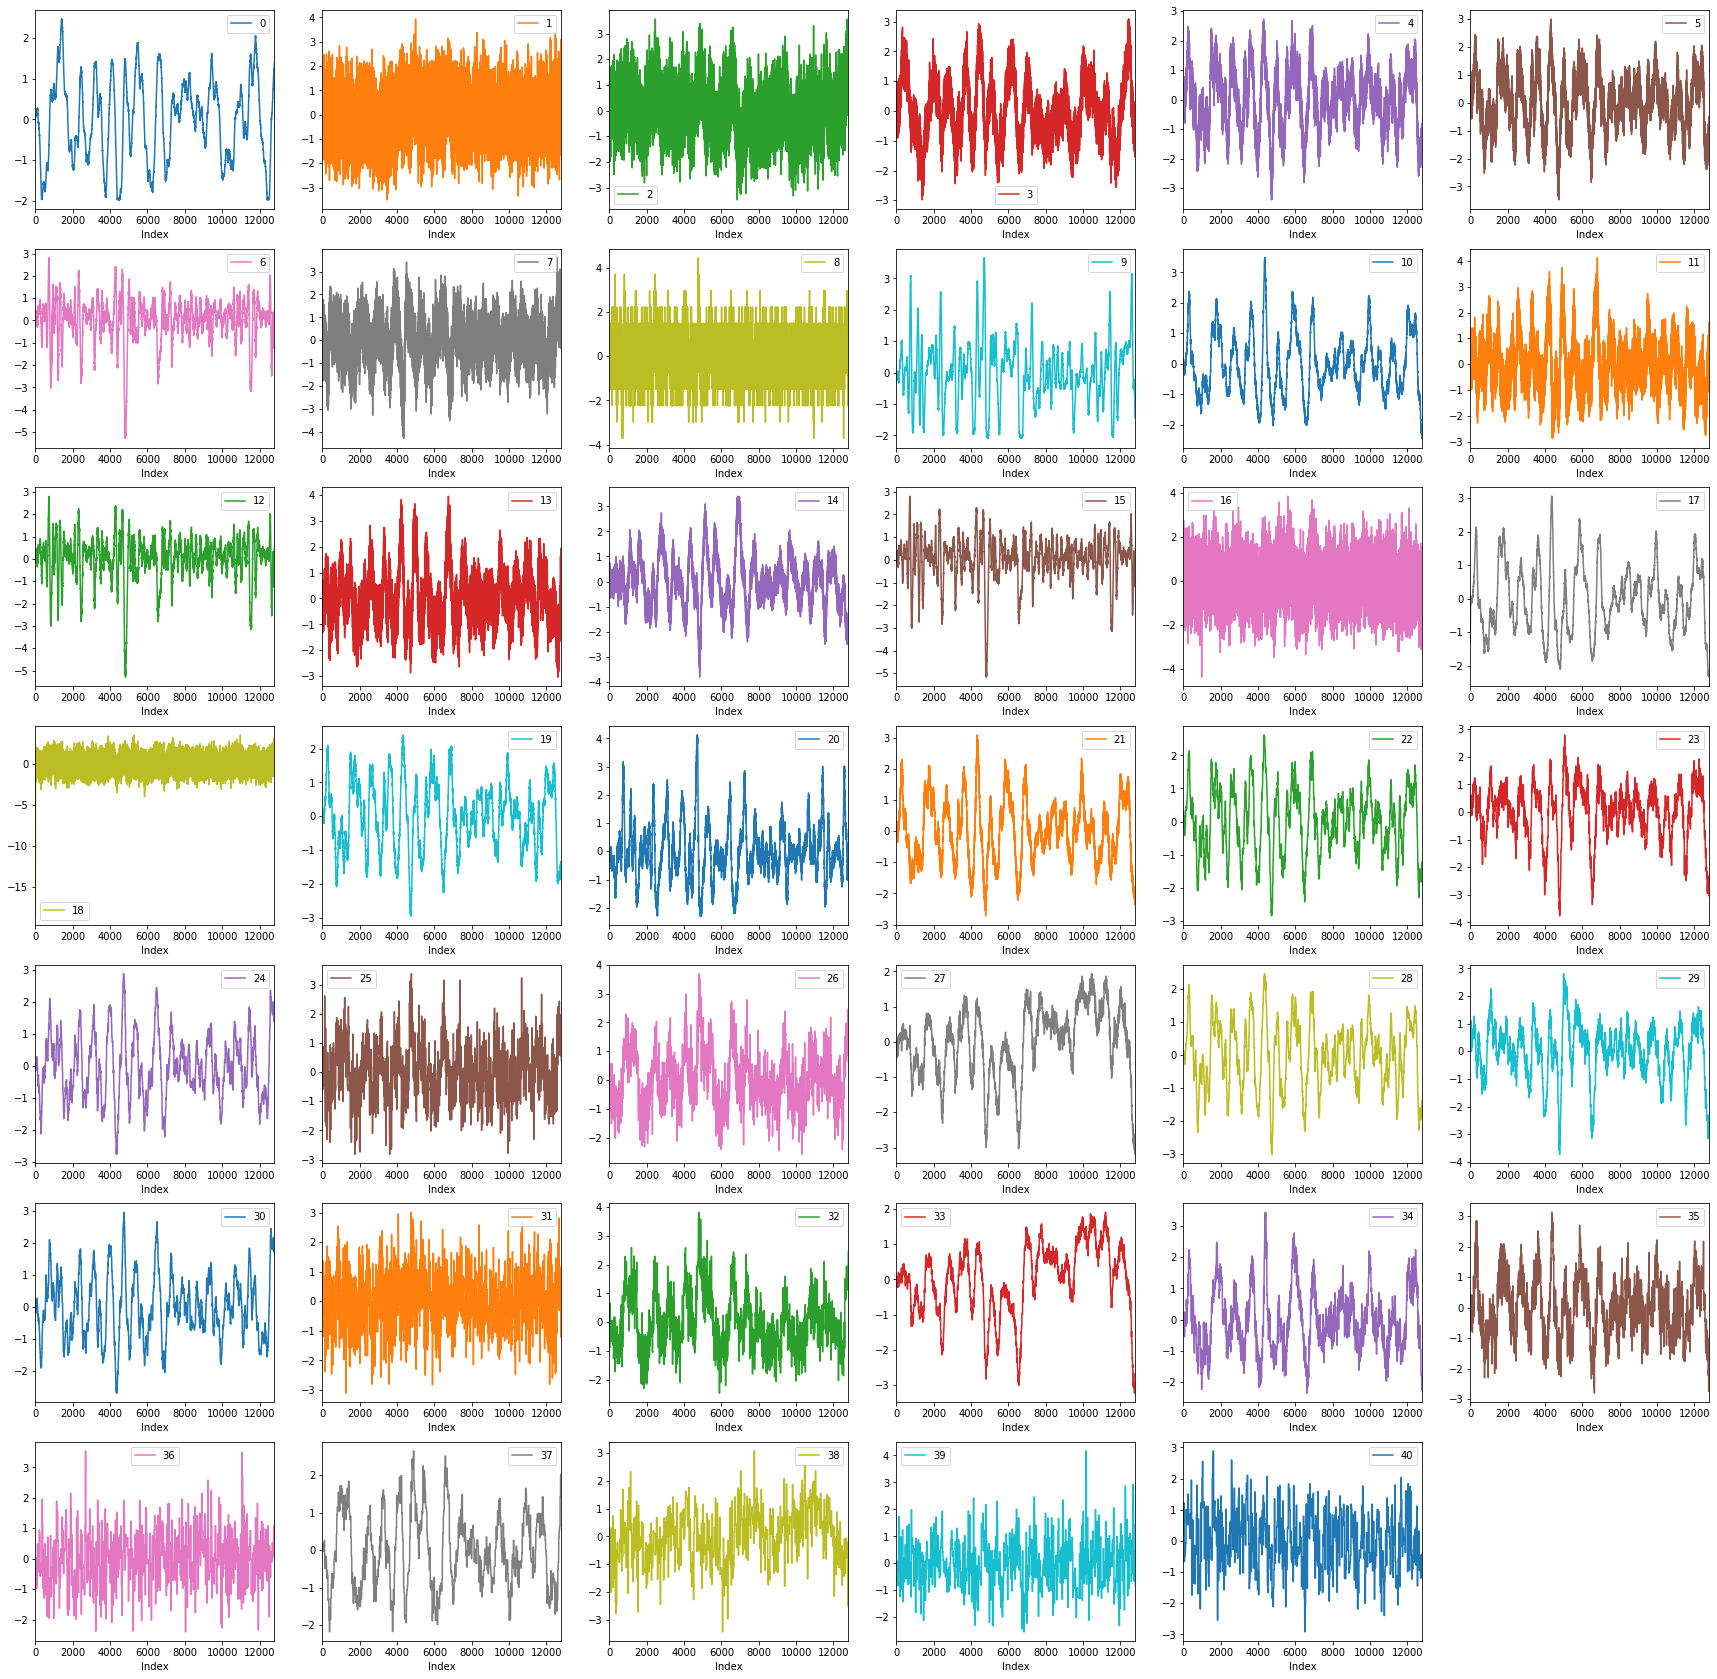

In [4]:
plt.figure(figsize=(30, 30))
data.plot(subplots=True, layout=(7, 6), ax=plt.gca());

In [4]:
window_length = 32
prediction_len = 2

X = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(window_length, data.shape[0] - prediction_len)
]).reshape(-1, window_length, data.shape[1])
y = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(window_length + prediction_len, data.shape[0])
]).reshape(-1, window_length, data.shape[1])

## Train model

In [6]:
from src.models.lstm import build_model
import keras

build_params = dict(
    input_length=window_length,
    input_shape=data.shape[1],
    lstm_layers_size=[32, 32],
    dropout_coeff=0.1,
    optimizer=keras.optimizers.Adam(lr=0.01),
    reg_strength=0.005,
)

fit_params = dict(
    batch_size=64,
    epochs=10,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau()]
)

Using TensorFlow backend.


In [7]:
from src.utils import cross_validate

results = cross_validate(lambda: build_model(**build_params), 3, fit_params, X, y)

W0911 18:15:08.232841 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 18:15:08.236759 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 18:15:08.240862 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Fold 0...


W0911 18:15:08.805594 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0911 18:15:09.239850 139953574184768 deprecation.py:323] From /home/elch10/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0911 18:15:10.435841 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0911 18:15:10.536122 139953574184768 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/b

Train on 3194 samples, validate on 3191 samples
Epoch 1/10
3194/3194 [==============================] - 4s 1ms/step - loss: 0.6028 - val_loss: 0.5695
Epoch 2/10
3194/3194 [==============================] - 2s 729us/step - loss: 0.4207 - val_loss: 0.5167
Epoch 3/10
3194/3194 [==============================] - 2s 731us/step - loss: 0.3894 - val_loss: 0.4976
Epoch 4/10
3194/3194 [==============================] - 2s 748us/step - loss: 0.3745 - val_loss: 0.4920
Epoch 5/10
3194/3194 [==============================] - 2s 731us/step - loss: 0.3630 - val_loss: 0.4787
Epoch 6/10
3194/3194 [==============================] - 2s 740us/step - loss: 0.3515 - val_loss: 0.4626
Epoch 7/10
3194/3194 [==============================] - 2s 724us/step - loss: 0.3349 - val_loss: 0.4386
Epoch 8/10
3194/3194 [==============================] - 2s 722us/step - loss: 0.3219 - val_loss: 0.4214
Epoch 9/10
3194/3194 [==============================] - 2s 725us/step - loss: 0.3154 - val_loss: 0.4104
Epoch 10/10
3194/3

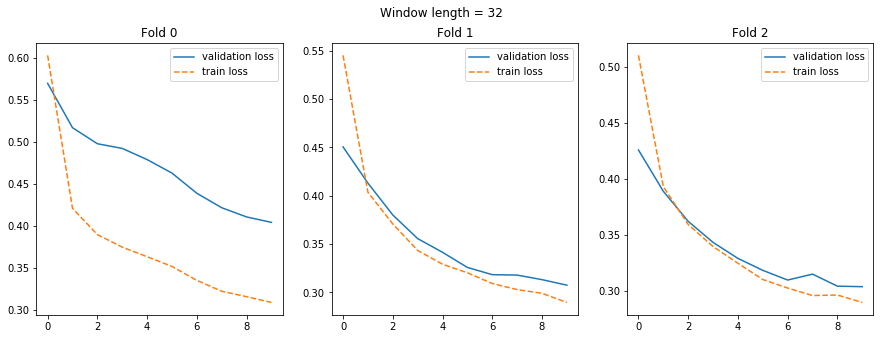

In [8]:
from src.visualization.visualize import visualize_result

visualize_result(results, f'Window length = {window_length}')

In [12]:
model = build_model(**build_params)
model.fit(X, y, **fit_params)

Epoch 1/10
12767/12767 [==============================] - 9s 727us/step - loss: 0.4995
Epoch 2/10
  320/12767 [..............................] - ETA: 7s - loss: 0.4190

/home/elch10/miniconda3/lib/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


12767/12767 [==============================] - 8s 617us/step - loss: 0.3827
Epoch 3/10
12767/12767 [==============================] - 8s 624us/step - loss: 0.3472
Epoch 4/10
12767/12767 [==============================] - 8s 613us/step - loss: 0.3319
Epoch 5/10
12767/12767 [==============================] - 8s 616us/step - loss: 0.3177
Epoch 6/10
12767/12767 [==============================] - 8s 613us/step - loss: 0.3106
Epoch 7/10
12767/12767 [==============================] - 8s 616us/step - loss: 0.3045
Epoch 8/10
12767/12767 [==============================] - 8s 616us/step - loss: 0.2949
Epoch 9/10
12767/12767 [==============================] - 8s 613us/step - loss: 0.2910
Epoch 10/10
12767/12767 [==============================] - 8s 607us/step - loss: 0.2876


In [14]:
model.save('models/lstm.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 32, 32)            9472      
_________________________________________________________________
lstm_8 (LSTM)                (None, 32, 32)            8320      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 32, 41)            1353      
Total params: 19,145
Trainable params: 19,145
Non-trainable params: 0
_________________________________________________________________


## Load and predict anomalies

In [5]:
def compute_diff(model, X):
    prediction = model.predict(X)
    return np.abs(y-prediction).sum(axis=2).sum(axis=1)

def find_anomaly(differences, treshold):
    return np.where(differences > treshold)[0]

In [6]:
from keras.models import load_model

model = load_model('models/lstm.h5')

Using TensorFlow backend.
W0913 12:43:16.907946 140066593834816 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 12:43:17.098746 140066593834816 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 12:43:17.157014 140066593834816 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 12:43:17.833940 140066593834816 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please u

(array([ 136.,  700., 2143., 3302., 3196., 1861.,  923.,  341.,  117.,
          48.]), array([291.51493591, 309.21672327, 326.91851062, 344.62029798,
        362.32208533, 380.02387269, 397.72566004, 415.4274474 ,
        433.12923475, 450.83102211, 468.53280946]), <a list of 10 Patch objects>)

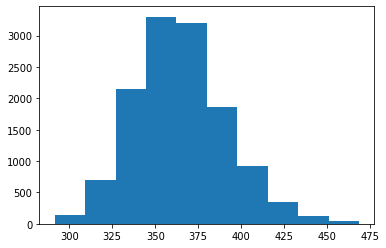

In [7]:
diff = compute_diff(model, X)
plt.hist(diff)

In [22]:
tresh = 450
anomaly_ids = find_anomaly(diff, tresh)
print(f'Found {len(anomaly_ids)} anomalies by tresh={tresh}')

Found 52 anomalies by tresh=450


In [24]:
from src.utils import inverse_ids
normal_ids = inverse_ids(anomaly_ids, len(X))
print(f'And {len(normal_ids)} normal values')

And 12715 normal values


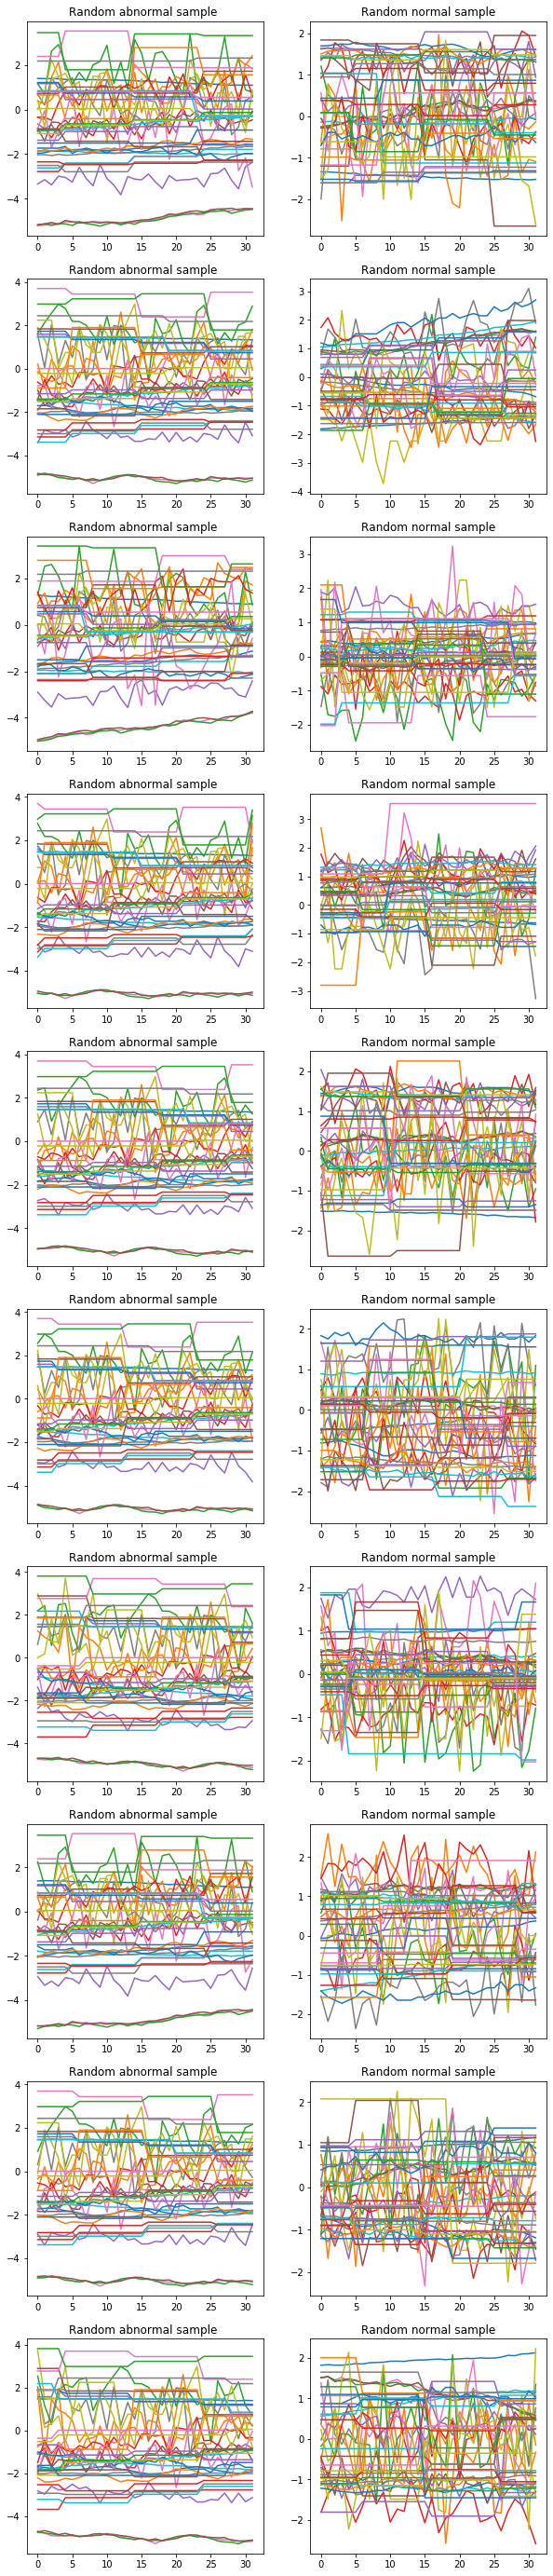

In [59]:
from src.visualization.visualize import plot_random
plot_random(X[anomaly_ids], X[normal_ids], 10)